In [1]:
# %load basic.py
from IPython.display import set_matplotlib_formats, display
import numpy as np
import pandas as pd
import graphviz
import os
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
from cycler import cycler

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


데이터가 2차원 실수형 배열로 각 열이 데이터 포인트를 설명하는 **연속형 특성**이라고 가정했습니다.  
일반적인 특성의 전형적인 형태는 **범주형(이산형) 특성**이라고 하는데 보통 숫자값이 아닙니다.  
이 값들은 중간값이 없고 카테고리들 사이에는 순서가 없습니다.  

특정 어플리케이션에 가장 적합한 데이터 표현을 찾는 것을 **특성 공학**(feature engineering)이라고 하며,  
데이터 과학자와 머신러닝 기술자가 실제 문제를 풀기 위해 당면하는 주요 작업 중 하나입니다.

# 4.1 범주형 변수

## 4.1.1 원-핫-인코딩(가변수)

**원핫인코딩, 원아웃오브엔인코딩**, 가변수  
- 범주형 변수를 표현하는 데 가장 널리 쓰이는 방법  
- 범주형 변수를 0 또는 1 값을 가진 하나 이상의 새로운 특성으로 바꾼 것

In [2]:
import os
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정하고
# 'names' 매개변수로 열 이름을 제공합니다.
data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'adult.data'), header = None, index_col = False,
                  names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                         'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
                         'native-country', 'income'])

# 예제를 위해 몇 개의 열만 선택합니다.
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


### 범주형 데이터 문자열 확인하기

In [3]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


객체 타입(문자열과 같은)이나 범주형을 가진 열을 자동으로 변환해주는 get_dummies 함수를 사용하여 인코딩

In [4]:
print("원본 특성 :\n", list(data.columns), '\n')
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성 :\n", list(data_dummies.columns))

원본 특성 :
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성 :
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation

In [5]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,...,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,...,0,0,1,0
1,50,13,0,0,...,0,0,1,0
2,38,40,0,0,...,0,0,1,0
3,53,40,0,0,...,0,0,1,0
4,28,40,0,0,...,0,0,1,0


In [6]:
# Pandas는 열 인덱싱 범위 끝을 포함합니다.
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

#Numpy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values

print("X.shape : {} y.shape : {}".format(X.shape, y.shape))

X.shape : (32561, 44) y.shape : (32561,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("테스트 점수 : {:.2f}".format(logreg.score(X_test, y_test)))

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


테스트 점수 : 0.81


**<<주의>>**  
훈련 데이터와 테스트 데이터 포인트를 모두 포함하는 DataFrame을 사용해 get_dummies 함수를 호출하거나 각각 get_dummies를 호출한 후에  
훈련 세트와 테스트 세트의 열 이름을 비교해서 같은 속성인지를 확인해야 합니다.

## 4.1.2 숫자로 표현된 범주형 특성

**<<주의>>**  
범주형 특성은 종종 숫자로 인코딩되는데, 특성의 값이 숫자라고 해서 연속형 특성으로 다뤄야 한다는 의미는 아닙니다.  
인코딩된 값 사이에 어떤 순서도 없으면, 이 특성은 이산적이라고 생각해야 합니다.

In [8]:
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame을 만듭니다.
demo_df = pd.DataFrame({'숫자 특성' : [0, 1, 2, 1], '범주형 특성' : ['양말', '여우', '양말', '상자']})
demo_df

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [9]:
pd.get_dummies(demo_df)

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


숫자 특성도 가변수로 만고 싶다면 columns 매개변수에 명시해야 합니다.

In [10]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
pd.get_dummies(demo_df, columns = ['숫자 특성', '범주형 특성'])

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


# 4.2 OneHotEncoder와 ColumnTransformer : scikit-learn으로 범주형 변수 다루기

In [11]:
from sklearn.preprocessing import OneHotEncoder
# Sparse = False로 설정하면 OneHotEncoder가 희소 행렬이 아니라 Numpy 배열을 반환합니다.
ohe = OneHotEncoder(sparse = False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


변환된 특성에 해당하는 원본 범주형 변수 이름을 얻으려면 get_feature_names 메서드를 사용합니다.

In [12]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_상자' 'x1_양말' 'x1_여우']


원핫인코더는 모든 특성을 범주형이라고 가정하기 때문에 바로 적용할 수 없기 때문에 ColumnTransformer 클래스가 필요합니다.  
이 클래스는 입력 데이터에 있는 열마다 다른 변환을 적용할 수 있습니다.  
-> 연속형 특성과 범주형 특성은 매우 다른 종류의 전처리 과정이 필요

In [13]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


선형 모델을 적용하여 소득을 예측하려면 범주형 변수에 원핫인코딩을 적용하고 연속형 변수인 age와 hours-per-week의 스케일도 조정해야 합니다.

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([('scaling', StandardScaler(), ['age', 'hours-per-week']),
                       ('onehot', OneHotEncoder(sparse = False),
                       ['workclass', 'education', 'gender', 'occupation'])])

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#income을 제외한 모든 열을 추출합니다.
data_features = data.drop('income', axis = 1)

# 데이터프레임과 income을 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state = 0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


-> get_dummies를 사용했을 때와 마찬가지로 44개의 특성이 만들어졌지만 연속형 특성을 스케일 조정했다는 것은 다릅니다.

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수 : {:.2f}".format(logreg.score(X_test_trans, y_test)))

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


테스트 점수 : 0.81


-> 데이터의 스케일이 영향을 미치지 못함 (get_dummies와 결과가 같음)

ColumnTransformer 안의 단계에 접근하기 위해 named_transformers_속성 사용

In [17]:
ct.named_transformers_.onehot

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=False)

# 4.3 make_column_transformer로 간편하게 ColumnTransformer 만들기

클래스 이름을 기반으로 자동으로 각 단계에 이름을 붙여주는 편리한 함수 make_column_transformer

In [18]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer((['age', 'hours-per-week'], StandardScaler()),
                            (['workclass', 'education', 'gender', 'occupation'], OneHotEncoder(sparse = False)))

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


# 4.4 구간 분할, 이산화 그리고 선형 모델, 트리 모델

데이터를 가장 잘 표현하는 방법은 데이터가 가진 의미뿐 아니라 어떤 모델을 사용하는지에 따라 다릅니다.  
폭넓게 사용하는 두 알고리즘인 선형 모델과 트리 기반 모델은 특성의 표현 방식으로 인해 미치는 영향이 매우 다릅니다.

#### 2장에서 사용한 wave dataset을 이용해 선형 회귀 모델과 결정 트리 회귀를 비교하기

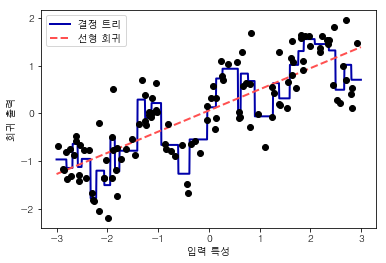

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples = 120)
line = np.linspace(-3, 3, 1000, endpoint = False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf = 3).fit(X, y)
plt.plot(line, reg.predict(line), label = '결정 트리')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label = '선형 회귀')
plt.plot(X[:, 0], y, 'o', c = 'k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc = 'best');

연속형 데이터에 아주 강력한 선형 모델을 만드는 방법 하나는 한 특성을 여러 특성으로 나누는 **구간 분할**입니다.

In [20]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins = 10, strategy = 'uniform')
kb.fit(X)
print("bin edges :\n", kb.bin_edges_)

bin edges :
 [array([-2.967, -2.378, -1.789, -1.2  , -0.612, -0.023,  0.566,  1.155,
        1.744,  2.333,  2.921])]


bin_edges_는 특성별로 경곗값이 저장되어 있고 길이가 1인 배열이 출력됩니다.  
기본적으로 KBinsDiscretizer는 구간에 원핫인코딩을 적용하고 구간마다 하나의 새로운 특성이 생기므로 희소 행렬을 만듭니다.

In [21]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

#### 희소 행렬을 밀집 배열로 변환하여 원본 데이터 포인트와 인코딩 결과 비교

In [22]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [ 2.197]
 [ 0.607]
 [ 1.248]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

첫 번째 데이터 포인트 -0.753이 네 번째 구간에 들어가고 두 번째 포인트 2.704는 열 번째 구간에 포함되었습니다.  
연속형 특성을 각 데이터 포인트가 어느 구간에 속했는지 원핫인코딩한 범주형 특성으로 변환했습니다.

In [23]:
kb = KBinsDiscretizer(n_bins = 10, strategy = 'uniform', encode = 'onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

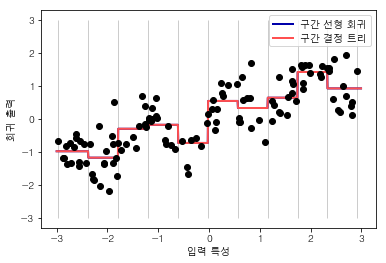

In [24]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = '구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split = 3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = '구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c = 'k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth = 1, alpha = .2)
plt.legend(loc = 'best')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성');

선형 회귀 모델과 결정 트리가 구간별로 예측한 것은 상숫값인데 같은 예측을 만들어내서 파선과 실선이 완전히 겹쳐졌습니다.  
-> 구간을 나눈 특성을 사용하기 전과 비교해보면 각 구간에서 다른 값을 가지고 있으므로 선형 모델이 훨씬 유연해졌지만 결정 트리는 덜 유연해졌습니다.  
(트리모델은 데이터를 자유롭게나눠 학습할 수 있으므로 특성의 값을 구간으로 나누는 것이 무의미함)

# 4.5 상호작용과 다항식

특성을 풍부하게 나타내는 또다른 방법은 원본 데이터에 **상호작용**(interaction)과 **다항식**(polynominal)을 추가하는 것입니다.

In [25]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


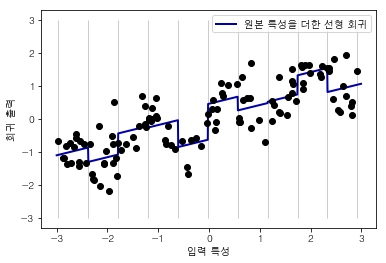

In [26]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label = '원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth = 1, alpha = .2)
plt.legend(loc = 'best')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.plot(X[:, 0], y, 'o', c = 'k');

x축 특성이 하나이므로 기울기도 하나입니다.  
-> 각 구간에서 다른 기울기를 가지는 게 더 좋을 것 같음

In [27]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


데이터 포인트가 속한 구간과 이 구간에 원본 특성을 곱한 값을 더해 20개의 특성을 가집니다.  
이 값은 구간 안에서는 원본 특성이고 다른 곳에서는 0입니다.

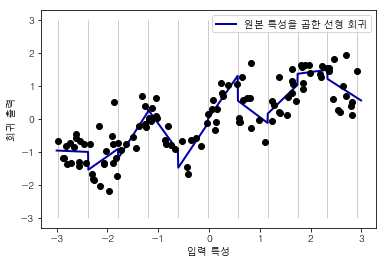

In [28]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label = '원본 특성을 곱한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth = 1, alpha = .2)

plt.plot(X[:, 0], y, 'o', c = 'k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc = 'best');

-> 각 구간의 절편과 기울기가 모두 다름

In [29]:
from sklearn.preprocessing import PolynomialFeatures

# x ** 10까지 고차항을 추가합니다.
# 기본값인 'include_bias = True'는 절편에 해당하는 1인 특성을 추가합니다.
poly = PolynomialFeatures(degree = 10, include_bias = False)
poly.fit(X)
X_poly = poly.transform(X)

In [30]:
print("X_poly.shape :", X_poly.shape)

X_poly.shape : (120, 10)


In [31]:
# X와 X_poly의 값을 비교해보겠습니다.
print("X 원소 :\n", X[:5])
print("X_poly 원소 :\n", X_poly[:5])

X 원소 :
 [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
X_poly 원소 :
 [[   -0.753     0.567    -0.427     0.321    -0.242     0.182    -0.137
      0.103    -0.078     0.058]
 [    2.704     7.313    19.777    53.482   144.632   391.125  1057.714
   2860.36   7735.232 20918.278]
 [    1.392     1.938     2.697     3.754     5.226     7.274    10.125
     14.094    19.618    27.307]
 [    0.592     0.35      0.207     0.123     0.073     0.043     0.025
      0.015     0.009     0.005]
 [   -2.064     4.26     -8.791    18.144   -37.448    77.289  -159.516
    329.222  -679.478  1402.367]]


In [32]:
print("항 이름 :", poly.get_feature_names())

항 이름 : ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


X_poly의 첫 번째 열은 X와 같고 다른 열은 첫 번째 열의 거듭제곱입니다.  
두 번째 행은 다른 값보다 월등히 커 20,000이 넘기도 합니다.  

다항식 특성을 선형 모델과 함께 사용하면 전형적인 **다항 회귀**(polynominal regression) 모델이 됩니다.

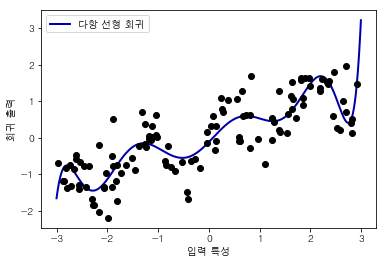

In [33]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label = '다항 선형 회귀')
plt.plot(X[:, 0], y, 'o', c = 'k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc = 'best');

다항식의 특성은 1차원 데이터셋에서도 매우 부드러운 곡선을 만듭니다.  
(고차원 다항식은 데이터가 부족한 영역에서 너무 민감하게 동작)

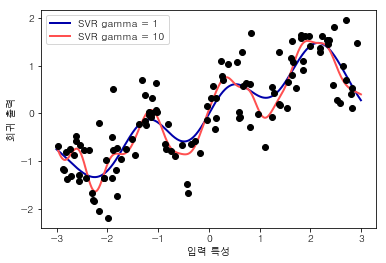

In [34]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma = gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label = 'SVR gamma = {}'.format(gamma))
    
plt.plot(X[:, 0], y, 'o', c = 'k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc = 'best');

-> 더 복잡한 모델인 커널 SVM을 사용해 특성 데이터를 변환하지 않고 다항 회귀와 비슷한 복잡도를 가진 예특을 만들었습니다.

In [35]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 0)

#데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
poly = PolynomialFeatures(degree = 2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("X_train.shape :", X_train.shape)
print("X_train_poly.shape :", X_train_poly.shape)

X_train.shape : (379, 13)
X_train_poly.shape : (379, 105)


원래 특성 13개에서 105개의 교차 특성으로 확장  
(새로운 특성은 원래 특성의 제곱은 물론 가능한 두 특성의 조합을 모두 포함함)  
-> degree = 2로 하면 원본 특성에서 두 개를 뽑아 만들 수 있는 모든 곱을 얻을 수 있음

In [37]:
print("다항 특성 이름 :\n", poly.get_feature_names())

다항 특성 이름 :
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


첫 번째 특성은 상수항, 즉 '1'입니다. 다음 13개 특성은 원본 특성('x0'에서 'x12'까지)입니다.  
그 다음은 첫 번째 특성의 제곱 항('x0^2')과 첫 번째 특성과 다른 특성 간의 조합니다.

#### 상호 작용 특성이 있는 데이터와 없는 데이터에 대해 Ridge를 사용해 성능 비교

In [38]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수 : {:.3f}".format(ridge.score(X_test_scaled, y_test)))

ridge_p = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수 : {:.3f}".format(ridge_p.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수 : 0.621
상호작용 특성이 있을 때 점수 : 0.753


In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수 : {:.3f}".format(rf.score(X_test_scaled, y_test)))

rf_p = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수 : {:.3f}".format(rf_p.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수 : 0.795
상호작용 특성이 있을 때 점수 : 0.774


랜덤 포레스트같이 복잡한 모델은 특성을 추가하지 않아도 Ridge의 성능이 비슷합니다.  
(오히려 상호작용과 다항식을 추가하면 성능이 조금 줄어듦)

# 4.6 일변량 비선형 변환

트리 기반 모델은 특성의 순서에만 영향을 받지만 선형 모델과 신경망은 각 특성의 스케일과 분포에 밀접하게 연관되어 있어  
log, exp, sin같은 수학 함수를 적용하는 방법도 특성 변화에 유용합니다.  
대부분의 모델은 각 특성이 (회귀에서는 타깃도) 정규분포와 비슷할 때 최고의 성능을 냅니다. -> 히스토그램이 종 모양과 비슷할 때

In [40]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size = (1000, 3))
w = rnd.normal(size = 3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [41]:
print("특성 출현 횟수 :\n", np.bincount(X[:, 0]))

특성 출현 횟수 :
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


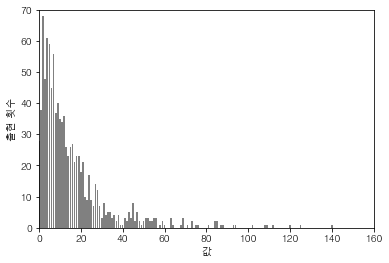

In [42]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color = 'grey')
plt.ylabel('출현 횟수')
plt.xlabel('값');

#### 리지 회귀 적용

In [43]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.622


데이터에 0이 있으면 log함수를 적용할 수 없으므로 log(X + 1) 사용

In [44]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

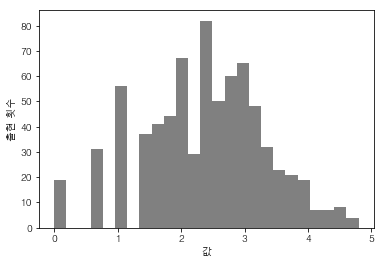

In [45]:
plt.hist(X_train_log[:, 0], bins = 25, color = 'gray')
plt.ylabel('출현 횟수')
plt.xlabel('값');

-> 데이터 분포가 덜 치우쳐 있으며 매우 큰 값을 가진 이상치가 보이지 않음

In [46]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.875


이런 변환은 트리 기반 모델에서는 불필요하지만 선형 모델에서는 필수입니다.  
(가끔 회귀에서 타깃 변수 y를 변환하는 것이 좋을 때도 있음)  

구간 분할, 다항식, 상호작용은 데이터가 주어진 상황에서 모댈의 성능에 큰 영향을 줄 수 있습니다.  
-> **특히** 선형 모델이나 나이브 베이즈 모델같은 덜 복잡한 모델일 경우

# 4.7 특성 자동 선택

보통 새로운 특성을 추가할 때나 고차원 데이터셋을 사용할 때,  
가장 유용한 특성만 선택하고 나머지는 무시해서 특성의 수를 줄이는 것이 좋습니다. -> 모델이 간단해지고 일반화 성능이 올라감  
**일변량 통계**(univariate statistics), **모델 기반 선택**(model-based selection), **반복적 선택**(iterative selection)  
-> 지도 학습 방법 (최적값을 찾으려면 타깃값 필요)

## 4.7.1 일변량 통계

개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지를 계산하여 깊게 관련되어 있다고 판단되는 특성을 선택합니다. -> **분산 분석**(ANOVA)  
(핵심 요소 : **일변량** - 각 특성이 독립적으로 평가된다는 점)

In [47]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 고정된 난수를 발생시킵니다.
rng = np.random.RandomState(42)
noise = rng.normal(size = (len(cancer.data), 50))

# 데이터에 노이즈 특성을 추가합니다.
# 처음 30개는 원본 특성이고 다음 50개는 노이즈입니다.
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state = 0, test_size = .5)

# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택합니다.
select = SelectPercentile(score_func = f_classif, percentile = 50)
select.fit(X_train, y_train)

# 훈련 세트에 적용합니다.
X_train_selected = select.transform(X_train)

print("X_train.shape :", X_train.shape)
print("X_train_selected.shape :", X_train_selected.shape)

X_train.shape : (284, 80)
X_train_selected.shape : (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


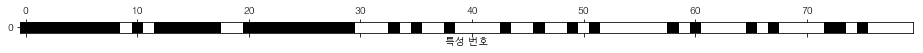

In [48]:
# get_support 메서드는 선택된 특성을 boolean값으로 표시하여 어떤 특성이 선택되었는지 확인할 수 있습니다.
mask = select.get_support()
print(mask)

# True는 검은색, False는 흰색으로 마스킹합니다.
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel('특성 번호')
plt.yticks([0]);

-> 선택된 특성은 대부분 원본 특성이고 노이즈 특성이 거의 모두 제거됨 (원본 특성이 완벽하게 복원된 것은 XX)

In [49]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수 : {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수 : {:.3f}".format(lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수 : 0.930
선택된 일부 특성을 사용한 점수 : 0.940


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 4.7.2 모델 기반 특성 선택

In [50]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42), threshold = 'median')

-> 일변량 분석으로 선택한 특성과 결과를 비교하기 위해 절반 가량의 특성이 선택될 수 있도록 중간값을 임계치로 사용

In [51]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape :", X_train.shape)
print("X_train_l1.shape :", X_train_l1.shape)

X_train.shape : (284, 80)
X_train_l1.shape : (284, 40)


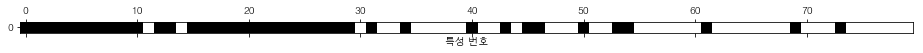

In [52]:
mask = select.get_support()

# True는 검은색, False는 흰색으로 마스킹합니다.
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel('특성 번호')
plt.yticks([0]);

-> 두 개를 제외한 모든 원본 특성 선택

In [53]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.951


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 4.7.3 반복적 특성 선택

특성의 수가 각기 다른 일련의 모델이 만들어집니다.  
1. 특성을 하나도 선택하지 않은 상태로 시작해서 어떤 종료 조건에 도달할 때까지 하나씩 추가하는 방법  
2. 모든 특성을 가지고 시작해서 어떤 종료 조건이 될 때까지 특성을 하나씩 제거해가는 방법  

**재귀적 특성 제거**(RFE)는 모든 특성으로 시작해서 모델을 만들고 특성 중요도가 가장 낮은 특성을 제거하고  
제거한 특성을 빼고 나머지 특성 전체로 새로운 모델을 만듭니다. -> 미리 정의한 특성갯수가 남을 때까지 반복

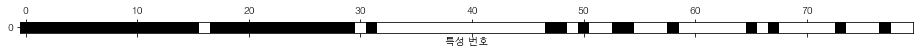

In [54]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators = 100, random_state = 42), n_features_to_select = 40)
select.fit(X_train, y_train)

# 선택된 특성을 표시합니다.
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel('특성 번호')
plt.yticks([0]);

-> 일변량 분석이나 모델 기반 선택보다 특성 선택이 나아졌지만, 특성 한 개는 여전히 놓침

In [55]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.951


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
print("테스트 점수 : {:.3f}".format(select.score(X_test, y_test)))

테스트 점수 : 0.951


-> 특성 선택이 제대로 되면 선형 모델의 성능은 랜덤 포레스트와 비슷

# 4.8 전문가 지식 활용

#### 전문가 지식을 사용하는 전형적인 사례 하나 - 앤디 집 앞의 자전거가 대여 가능한지 예측하는 작업

In [57]:
citibike = mglearn.datasets.load_citibike()

print("시티 바이크 데이터 :\n", citibike.head())

시티 바이크 데이터 :
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


C:\Users\hyooo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


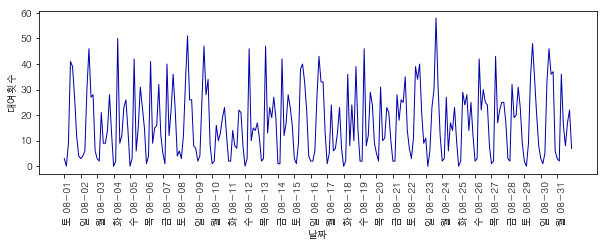

In [58]:
# 8월 한 달 동안의 대여 횟수를 그래프로 나타낸 것
plt.figure(figsize = (10, 3))
xticks = pd.date_range(start = citibike.index.min(), end = citibike.index.max(), freq = 'D')
week = ['일', '월', '화', '수', '목', '금', '토']
xticks_name = [week[int(w)] + d for w, d in zip(xticks.strftime("%w"), xticks.strftime(" %m-%d"))]
plt.xticks(xticks, xticks_name, rotation = 90, ha = 'left')
plt.plot(citibike, linewidth = 1)
plt.xlabel('날짜')
plt.ylabel('대여횟수');

In [59]:
# 타깃값 추출 (대여 횟수)
y = citibike.values

# POSIX 시간을 10**9로 나누어 변경
X = citibike.index.astype('int64').values.reshape(-1, 1) // 10**9

In [60]:
# 처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용합니다
n_train = 184

# 주어진 특성을 사용하여 평가하고 그래프를 만듭니다
def eval_on_features(features, target, regressor):
    # 훈련 세트와 테스트 세트로 나눕니다
    X_train, X_test = features[:n_train], features[n_train:]
    
    # 타깃값도 나눕니다
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2 : {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize = (10, 3))

    plt.xticks(range(0, len(X), 8), xticks_name, rotation = 90, ha = 'left')

    plt.plot(range(n_train), y_train, label = '훈련')
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label = '테스트')
    plt.plot(range(n_train), y_pred_train, '--', label = '훈련 예측')

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label = '테스트 예측')
    plt.legend(loc = (1.01, 0))
    plt.xlabel('날짜')
    plt.ylabel('대여횟수');

테스트 세트 R^2 : -0.04


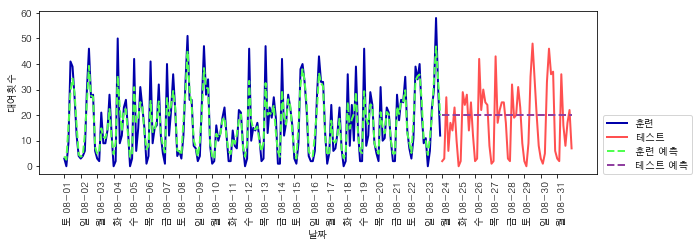

In [61]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

트리 모델인 랜덤 포레스트는 훈련 세트에 있는 특성의 범위 밖으로 **외삽**(extrapolation)할 수 있는 능력이 없습니다.  
-> 테스트 세트와 가장 가까이 있는 마지막 훈련 세트 데이터의 타깃값을 예측으로 사용

테스트 세트 R^2 : 0.60


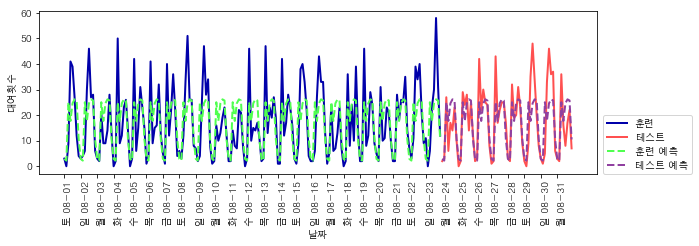

In [62]:
# 시간 특성 추가
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

-> 주간 패턴은 예측 못함

테스트 세트 R^2 : 0.84


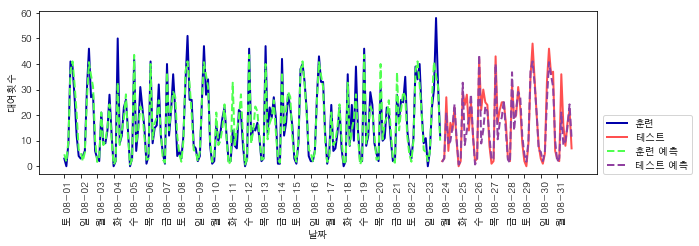

In [63]:
# 시간, 요일 정보 추가
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1), citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

테스트 세트 R^2 : 0.13


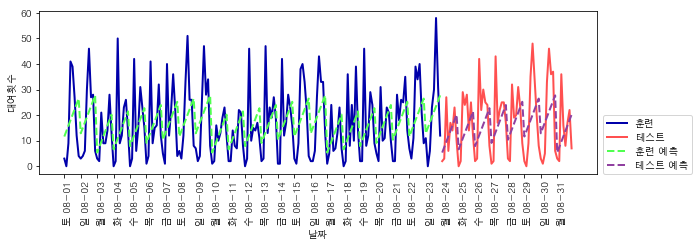

In [64]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

-> 요일과 시간이 정수로 인코딩되어 있어 연속형 변수로 해석되기 때문에 성능이 안좋음

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


테스트 세트 R^2 : 0.62


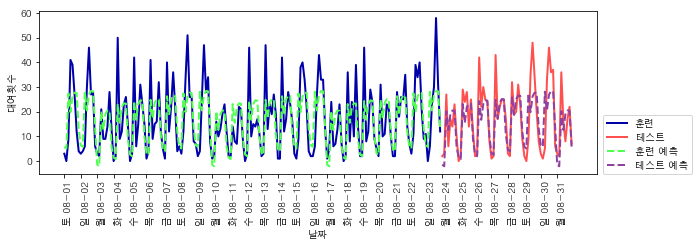

In [65]:
# 원핫인코더를 사용하여 범주형 변수로 해석하게 함
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

eval_on_features(X_hour_week_onehot, y, Ridge())

테스트 세트 R^2 : 0.85


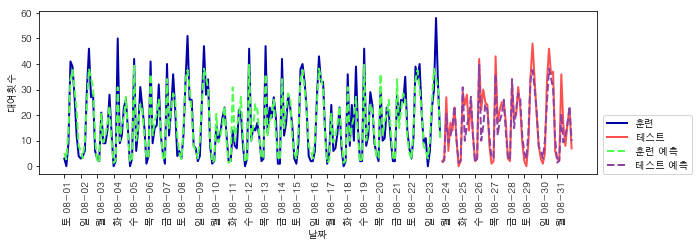

In [66]:
# 상호 작용 특성을 사용하여 시간과 요일의 조합별 계수를 학습
poly_transformer = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [67]:
hour = ['%02d:00' % i for i in range(0, 24, 3)]
day = ['월', '화', '수', '목', '금', '토', '일']
features =  day + hour

In [68]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

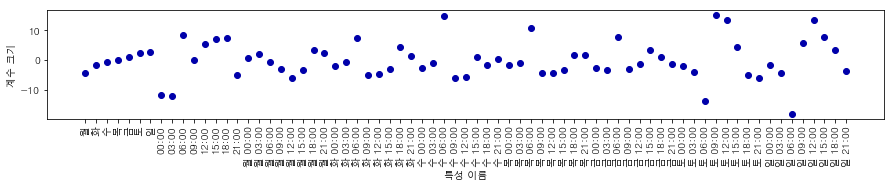

In [69]:
plt.figure(figsize = (15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation = 90)
plt.xlabel('특성 이름')
plt.ylabel('계수 크기');

# 4.9 요약 및 정리

- 머신러닝 알고리즘에 적합한 방식으로 데이터를 표현하는 것이 아주 중요!!(ex : 원핫 인코딩 범주형 변수)  
- 새로운 특성 만들기  
- 데이터에서 특성을 유도하기 위해 전문가의 지식 활용  
- **특히!!** 선형 모델은 구간 분할이나 다항식과 상호작용 특성을 새로 추가해 큰 성능 개선 얻어냄